# Objectifs

Les objectifs de la leçon sont les suivants:
* Calculer la correlation entre 2 variables
* Fit une régression linéaire avec `statsmodels`
* Interpreter la qualité de la régression linéaire

# Importer les librairies

In [1]:
#pip install statsmodels

In [2]:
import pandas as pd
import numpy as np
import os

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Machine learning
import statsmodels.api as sm

# Loader les données

In [3]:
# Loader les data
filepath = os.getcwd() + "/Data/salary_data.csv"
data = pd.read_csv(
    filepath,
    delimiter=","
)

data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# (rapide) Analyse exploratoire des données

## Analyse rapide

In [4]:
# Quelques statistics 
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
# Manque-t-il des valeurs (NaN)?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


## Analyse bivariée

[`sns.pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html) permet de visualiser les relations entre les variables de notre jeu de données.

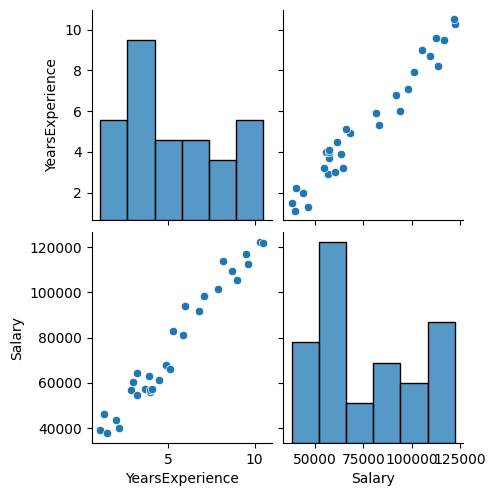

In [6]:
# Etudier la relation entre les variables indépentes et la variable dépendente
sns.pairplot(
    data=data,
    corner=False # pour eviter d'avoir les scatter plots en double
)
plt.show()

Les 2 variables quantitatives semblent être **liées d'un point de vue linéaire**. On s'attend donc à avoir un **coefficient de correlation positif et donc proche de 1**.

## Correlation

La fonction [`.corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) permet de calculer la correlation entre les variables **quantitatives**.

In [7]:
# Calculons le coefficient de correlation entre les 2 variables
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


Le coefficient de correlation étant entre 0.6 et 1.0, la **correlation est donc élevée**.

# Régression linéaire

Nos premières assumptions sont confirmées: les variables sont liées linéairement, corréléees et on aimerait trouver la droite de best fit qui passe entre ces 2 variables. Pour cela, nous allons utiliser la fonction [`statsmodels.OLS`](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html) (Ordinary Least Squares), qui est la méthode classique.  

## Fit une régression linéaire

Il faut dans un premier temps que nous séparions en deux dataframes les variables: une variable X et une variable Y.

In [8]:
# Séparer les variables
x = data["YearsExperience"]
y = data["Salary"]

Voici le modèle que nous allons produire:

$$ \underbrace{\text{Salary}}_{y} = \underbrace{a}_{\text{slope/pente}} \cdot  \underbrace{YearsExperience}_{\text{x}} + \underbrace{b}_{\text{intercept}} $$

In [9]:
# Générer un model de régression linéaire
model = sm.OLS(
    y,
    sm.add_constant(x) # il faut rajouter une constante, qui n'est pas là par défaut
)

# Fit le model
model_fit = model.fit()

# Quel est le résumé?
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 26 Feb 2025   Prob (F-statistic):           1.14e-20
Time:                        16:31:36   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     

Un tas d'information nous ai présenté dans le résumé ci-dessus. On remarque notamment que le **R-squared est de 95.7%**, ce qui est très élevé. Ceci était attendu puisque le coefficient de correlation était supérieur à 0.9.

On note aussi que la **slope/pente est positive et élevé** (9449), ce qui confirme que plus l'on a d'années d'expérience, plus notre salaire semble être élevé.

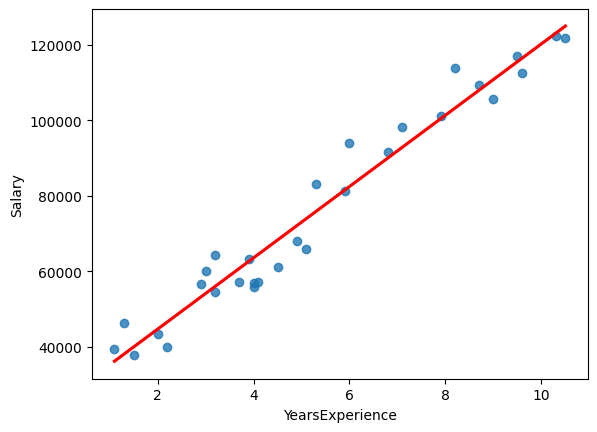

In [10]:
# Faisons un plot de la régression linéaire
sns.regplot(
    data=data,
    x=x,
    y=y,
    ci=False, # no need for the confidence interval
    line_kws={"color": "red"} # red line
)
plt.show()